#### For this Assignment you have been given a data which is a subset of a bigger dataset which was collected by Buffalo Tax department. It contains information regarding the various properties in Buffalo.

Number of Instances: 92508

Number of Attributes: 16 (including the target variable)

Attribute Information:

| Column Name                | Description                                                                                                                                      | Type        |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| TOTAL VALUE                | The combined assessed value of the land and improvements on the parcel                                                                           | Number      |
| FRONT                      | The width of the front of property (in feet)                                                                                                     | Number      |
| DEPTH                      | The depth of the property (in feet)                                                                                                              | Number      |
| PROPERTY CLASS             | Property Type Classification Codes describe the primary use of each parcel of real property on the assessment roll                               | Number      |
| LAND VALUE                 | The assessed value of the land                                                                                                                   | Number      |
| SALE PRICE                 | The price that the parcel of real property was last sold for                                                                                     | Number      |
| YEAR BUILT                 | The year the primary building on the parcel was built                                                                                            | Number      |
| TOTAL LIVING AREA          | The amount of living space (in square feet)                                                                                                      | Number      |
| OVERALL CONDITION          | A grade of the condition of the property                                                                                                         | Number      |
| BUILDING STYLE             | A code for the style of building                                                                                                                 | Number      |
| HEAT TYPE                  | The type of heating system in the building (only applicable to residential properties)                                                           | Number      |
| BASEMENT TYPE              | The type of basement on the property (only applicable to residential properties)                                                                 | Number      |
| # OF STORIES               | The number of floors/Stories in the property                                                                                                     | Number      |
| # OF FIREPLACES            | The number of fireplaces in a dwelling (only applicable to residential properties)                                                               | Number      |
| # OF BEDS                  | The number of beds in a dwelling (only applicable to residential properties)                                                                     | Number      |
| # OF BATHS                 | The number of baths in a dwelling (only applicable to residential properties)                                                                    | Number      |
| # OF KITCHENS              | The number of kitchens in a dwelling (only applicable to residential properties)                                                                 | Number      |



There are no missing Attribute Values.

Your task is to implement a Linear Regression Model to predict the TOTAL VALUE of a property

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

#### STEP 1 - Load Data (Already Done)

In [7]:
df = pd.read_csv('//content//data.csv', dtype=np.float64)

In [8]:
df.head()

,TOTAL VALUE,FRONT,DEPTH,PROPERTY CLASS,LAND VALUE,SALE PRICE,YEAR BUILT,TOTAL LIVING AREA,OVERALL CONDITION,BUILDING STYLE,HEAT TYPE,BASEMENT TYPE,# OF FIREPLACES,# OF BEDS,# OF BATHS,# OF KITCHENS
0,26600.0,11.0,0.0,411.0,2600.0,1.0,1985.0,1283.0,3.0,14.0,3.0,1.0,0.0,2.0,1.0,1.0
1,200.0,23.0,0.0,340.0,200.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0
2,25000.0,99.0,1440.0,311.0,25000.0,100000.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0
3,26300.0,40.0,60.0,220.0,1600.0,1.0,1900.0,2444.0,3.0,8.0,2.0,4.0,0.0,5.0,2.0,2.0
4,52100.0,35.0,200.0,210.0,2800.0,0.0,1926.0,2144.0,3.0,8.0,2.0,4.0,1.0,4.0,2.0,1.0


In [9]:
y = np.asarray(df['TOTAL VALUE'] )
y = y.reshape(y.shape[0],1)
feature_cols = df.columns.to_list()
feature_cols.remove('TOTAL VALUE')
x = np.asarray(df[feature_cols])

Variable **y** contains the total values of the property

Variable **x** contains the features

#### STEP 2 - Split the Data into training and testing and validation split ( 70% Training, 20% Testing and 10% validation) ( Hint: you can use the sklearn library for this step only) ( 5 Points)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
#Training , test and validation split into 70%, 20%, 10%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1) #0.125*0.8=0.1

#### STEP 3 - Scale Data Using Min Max Scaler (10 Points)
For each feature scaled value can be calculated using $  x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}$


In [12]:
#STEP 3

list_col =[]
for i in pd.DataFrame(x_train).columns:
  
  xscaled_numerator = pd.DataFrame(x_train)[i]-min(pd.DataFrame(x_train)[i]) #numerator
  xscaled_denominator = max(pd.DataFrame(x_train)[i]) - min(pd.DataFrame(x_train)[i])  #denominator
  # print(max(pd.DataFrame(x_train)[i]))
  # print(min(pd.DataFrame(x_train)[i]))
  list_col.append(xscaled_numerator/xscaled_denominator) #appending in list
  df_x_train_scaled = pd.DataFrame(np.array(list_col).T) #making dataframe
  
x_train1=df_x_train_scaled #scaled data in x_train1
x_train1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000360,0.007170,0.013141,0.002226,1.123596e-08,0.945022,0.225008,0.666667,0.500000,0.6,1.0,0.0,0.500000,0.250,0.666667
1,0.000360,0.001557,0.132720,0.000069,1.123596e-08,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000
2,0.000309,0.006667,0.132720,0.000199,5.617978e-06,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000
3,0.000360,0.007233,0.000000,0.000225,4.820225e-04,0.954928,0.101738,0.666667,0.500000,0.6,1.0,0.0,0.250000,0.125,0.333333
4,0.000360,0.006415,0.013141,0.000727,3.685393e-04,0.954433,0.256536,0.666667,0.500000,0.6,0.8,0.0,0.500000,0.250,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64750,0.000412,0.004969,0.000000,0.000372,1.123596e-08,0.967806,0.102507,0.666667,0.277778,0.6,1.0,0.0,0.250000,0.125,0.333333
64751,0.000360,0.006730,0.013141,0.000823,2.247191e-04,0.947003,0.187019,0.666667,0.500000,0.6,1.0,0.0,0.333333,0.375,0.666667
64752,0.000257,0.006289,0.132720,0.000268,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000
64753,0.000329,0.007673,0.132720,0.000147,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000


In [14]:
#same thing for y_train
list_col_y =[]
for i in pd.DataFrame(y_train).columns:
  
  yscaled_numerator = pd.DataFrame(y_train)[i]-min(pd.DataFrame(y_train)[i])
  yscaled_denominator = max(pd.DataFrame(y_train)[i]) - min(pd.DataFrame(y_train)[i])  
  # print(max(pd.DataFrame(x_train)[i]))
  # print(min(pd.DataFrame(x_train)[i]))
  list_col_y.append(yscaled_numerator/yscaled_denominator)
df_y_train_scaled = pd.DataFrame(np.array(list_col_y).T)

y_train1=df_y_train_scaled
y_train1

,0
0,0.000923
1,0.000004
2,0.000012
3,0.000240
4,0.000570
...,...
64750,0.000216
64751,0.000164
64752,0.000016
64753,0.000009


In [13]:
#scaling validation
list_col_xval =[]
for i in pd.DataFrame(x_val).columns:
  
  yscaled_numerator = pd.DataFrame(x_val)[i]-min(pd.DataFrame(x_val)[i]) #numerator
  yscaled_denominator = max(pd.DataFrame(x_val)[i]) - min(pd.DataFrame(x_val)[i])    #denominator
  # print(max(pd.DataFrame(x_train)[i]))
  # print(min(pd.DataFrame(x_train)[i]))
  list_col_xval.append(yscaled_numerator/yscaled_denominator) #appending in list
df_y_train_scaled = pd.DataFrame(np.array(list_col_xval).T) #making dataframe

x_val1=df_y_train_scaled #scaled data in x_val1
x_val1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.013233,0.056025,0.013280,0.000970,7.915331e-08,0.931649,0.255609,0.666667,0.500000,0.6,0.8,0.000000,0.363636,0.333333,0.666667
1,0.018968,0.056025,0.000000,0.001624,0.000000e+00,0.987618,0.206731,0.666667,0.333333,0.6,1.0,0.000000,0.272727,0.333333,0.333333
2,0.013233,0.044909,0.000000,0.000802,4.353432e-03,0.946508,0.157185,0.666667,0.500000,0.6,0.8,0.000000,0.272727,0.166667,0.333333
3,0.011028,0.044464,0.134130,0.000401,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.026467,0.048466,0.000000,0.001456,0.000000e+00,0.986627,0.280449,0.666667,0.333333,0.6,0.4,0.142857,0.272727,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,0.013674,0.000000,0.361222,0.000759,7.915331e-08,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9247,0.017644,0.046243,0.000000,0.001055,4.551315e-03,0.961367,0.148504,0.666667,0.277778,0.6,1.0,0.000000,0.181818,0.166667,0.333333
9248,0.013233,0.046243,0.013280,0.000295,1.187300e-03,0.941555,0.247863,0.333333,0.500000,0.4,0.4,0.000000,0.363636,0.333333,0.666667
9249,0.017203,0.112050,0.000000,0.000823,0.000000e+00,0.951461,0.268296,0.666667,0.500000,0.8,1.0,0.000000,0.363636,0.333333,0.333333


In [15]:
#same for y_val
list_col_yval =[]
for i in pd.DataFrame(y_val).columns:
  
  yscaled_numerator = pd.DataFrame(y_val)[i]-min(pd.DataFrame(y_val)[i])
  yscaled_denominator = max(pd.DataFrame(y_val)[i]) - min(pd.DataFrame(y_val)[i])  
  # print(max(pd.DataFrame(x_train)[i]))
  # print(min(pd.DataFrame(x_train)[i]))
  list_col_yval.append(yscaled_numerator/yscaled_denominator)
df_y_train_scaled = pd.DataFrame(np.array(list_col_yval).T)

y_val1=df_y_train_scaled
y_val1

,0
0,0.000323
1,0.000567
2,0.000379
3,0.000014
4,0.000485
...,...
9246,0.000343
9247,0.000503
9248,0.000156
9249,0.000325


In [16]:
#scaling x_test
list_col_xtest =[]
for i in pd.DataFrame(x_test).columns:
  
  yscaled_numerator = pd.DataFrame(x_test)[i]-min(pd.DataFrame(x_test)[i])
  yscaled_denominator = max(pd.DataFrame(x_test)[i]) - min(pd.DataFrame(x_test)[i])  
  # print(max(pd.DataFrame(x_train)[i]))
  # print(min(pd.DataFrame(x_train)[i]))
  list_col_xtest.append(yscaled_numerator/yscaled_denominator)
df_x_test_scaled = pd.DataFrame(np.array(list_col_xtest).T)

x_test1=df_x_test_scaled
x_test1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.108187,0.023903,0.403718,0.015922,0.000000e+00,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.014000,0.004809,0.361222,0.003459,1.130502e-02,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.011667,0.007786,0.000000,0.000587,1.846487e-03,0.951461,0.109916,0.666667,0.5625,0.6,1.0,0.000000,0.3,0.142857,0.333333
3,0.079667,0.009160,0.159363,0.002023,1.318919e-03,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.010000,0.007895,0.134130,0.000183,3.768341e-08,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18497,0.012000,0.008397,0.361222,0.000522,9.232434e-04,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000
18498,0.030667,0.010229,0.135458,0.000392,3.768341e-08,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.000000
18499,0.010000,0.006794,0.000000,0.000522,1.053251e-02,0.941555,0.189189,0.833333,0.5625,0.6,1.0,0.000000,0.4,0.285714,0.333333
18500,0.020000,0.000000,0.094290,0.001579,3.768341e-08,0.951461,0.255424,0.666667,0.5625,0.8,1.0,0.000000,0.6,0.285714,0.000000


In [17]:
#scaling y_test
list_col_ytest =[]
for i in pd.DataFrame(y_test).columns:
  
  yscaled_numerator = pd.DataFrame(y_test)[i]-min(pd.DataFrame(y_test)[i]) #numerator
  yscaled_denominator = max(pd.DataFrame(y_test)[i]) - min(pd.DataFrame(y_test)[i])  
  # print(max(pd.DataFrame(x_train)[i]))
  # print(min(pd.DataFrame(x_train)[i]))
  list_col_ytest.append(yscaled_numerator/yscaled_denominator)
df_y_test_scaled = pd.DataFrame(np.array(list_col_ytest).T)

y_test1=df_y_test_scaled
y_test1

,0
0,0.144759
1,0.008860
2,0.001240
3,0.000392
4,0.000035
...,...
18497,0.001190
18498,0.000081
18499,0.002152
18500,0.002329


#### STEP 4 - Initialize values for the weights, No. of Epochs and Learning Rate (5 Points)

In [83]:
# #STEP 4
# #w= np.dot(np.linalg.inv(np.dot(x_train.T,x_train)),np.dot(x_train.T,y_train))
# #import random
w0=0
w=np.random.rand(1, len(x_train1.columns))
#len(x_train)


In [84]:
w

array([[0.30769333, 0.27930429, 0.71580275, 0.49581734, 0.97383764,
        0.49460793, 0.32049534, 0.9431483 , 0.86980333, 0.05231373,
        0.9358067 , 0.94788222, 0.71186954, 0.84898602, 0.06169547]])

In [86]:
#atch_size=32
epochs=25
learning_rate=0.1

#### STEP 5 - Train Linear Regression Model (40 Points)
 5.1 Start a Loop For each Epoch
 
 5.2 Find the predicted value using $ y(x,w) = w_0 + w_1x $ for the training and validation splits (10 Points)
 
 5.3 Find the Loss using Mean Squared Error for the training and validation splits and store in a list (10 Points)
 
 5.4 Calculate the Gradients (15 Points)
 
 5.5 Update the weights using the gradients (5 Points)

In [94]:
# STEP 5

mse_train_plot=[] #mse train list
mse_val_plot=[] #mse val list
epoch_list=[] 
for i in range(epochs):
  epoch_list.append(i)
  
  #training 
  y_pred=w0+np.multiply(w,x_train1) #y_pred of training set
  
  mse_train_plot.append(np.average(((y_train1-y_pred)*(y_train1-y_pred)),axis=0)[0]) #mse_train for each epoch
  
  mse_train=sum(list(np.power((y_train1-y_pred),2))) / len(y_train1) #average mse of all epochs
  
  #validation

  y_predval=w0+np.multiply(w,x_val1)

  mse_val_plot.append(np.average(((y_val1-y_predval)*(y_val1-y_predval)),axis=0)[0])

  mse_val=np.average(np.power((y_val1-y_predval),2),axis=0)
  
  #testing
  y_predtest=w0+np.multiply(w,x_test1)
  
  

  derv_m = (-2/len(x_train1))*sum(x_train1*(y_train1-y_pred)) #first derivative for weights w
  derv_n = (-2/len(x_train1))*sum(y_train1-y_pred) #derivatives for bias w0
  
  ####UPDATING WEIGHTS
  w=(w-learning_rate)*derv_m
  w0=(w0-learning_rate)*derv_n

  #count=count+1
#print(mse_train)
  #
#mse_train

#calculating mse_train and mse_val for each epoch
#for i in epochs:



In [120]:
####TESTING SET: y_predtest
#epoch_list=[]
for i in range(epochs):
  #epoch_list.append(i)
  y_predtest=w0+np.multiply(w,x_test1)
  derv_m = (-2/len(x_test1))*sum(x_test1*(y_test1-y_predtest))
  derv_n = (-2/len(x_test1))*sum(y_test1-y_predtest)
  #updating weights
  w=(w-learning_rate)*derv_m
  w0=(w0-learning_rate)*derv_n

#### STEP 6 - Evaluate the Model ( 25 Points)
6.1 Plot a graph of the Training and Validation Loss wrt epochs (10 Points)

6.2 Find the R2 Score of the trained model for the Train, Test and Validation splits (15 Points)

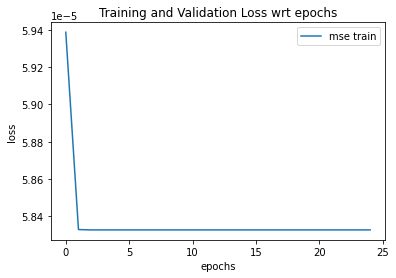

In [97]:
# STEP 6
####Training loss wrt epochs
import matplotlib.pyplot as plt

plt.plot(mse_train_plot,label='mse train')
#plt.plot(mse_val_plot,label='mse val')
plt.title('Training  wrt epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


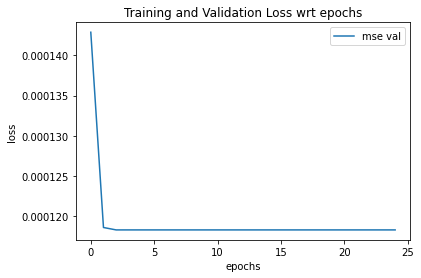

In [98]:
###validation loss wrt epochs
import matplotlib.pyplot as plt

#plt.plot(mse_train_plot,label='mse train')
plt.plot(mse_val_plot,label='mse val')
plt.title('Validation Loss wrt epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [134]:

def r_square(y, y_predict):
    y_mean = y.mean()
    total_ss = ((y-y_mean)**2).sum()
    result_ss = ((y-y_predict)**2).sum()
    return 1 - (result_ss/total_ss)


-0.006323952246314324


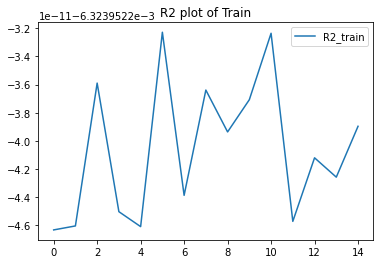

In [135]:
import matplotlib.pyplot as plt

#plt.plot(mse_train_plot,label='mse train')
plt.plot(r_square(y_train,y_pred),label='R2_train')
plt.title('R2 plot of Train')
#plt.xlabel('epochs')
#plt.ylabel('loss')
plt.legend()
print(r_squared(y_train,y_pred)[0])


-0.005317760792535431

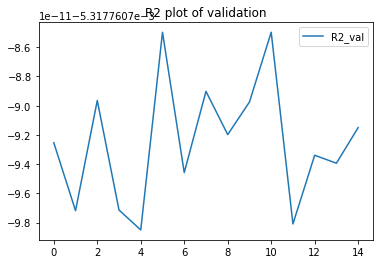

In [136]:
import matplotlib.pyplot as plt

#plt.plot(mse_train_plot,label='mse train')
plt.plot(r_square(y_val,y_predval),label='R2_val')
plt.title('R2 plot of validation')
#plt.xlabel('epochs')
#plt.ylabel('loss')
plt.legend()
r_squared(y_val,y_predval)[0]

-0.020694351701506575

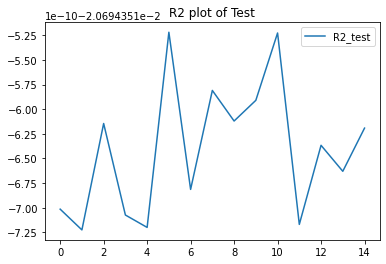

In [137]:
import matplotlib.pyplot as plt

#plt.plot(mse_train_plot,label='mse train')
plt.plot(r_square(y_test,y_predtest),label='R2_test')
plt.title('R2 plot of Test')
#plt.xlabel('epochs')
#plt.ylabel('loss')
plt.legend()
r_squared(y_test,y_predtest)[0]